In [1]:
%%capture
import sys
import glob, os
import pyicon as pyic
import smt_modules.all_funcs as eva
from smt_modules.icon_smt_levels import dzw, dzt, depthc, depthi
import smt_modules.tools as tools

import pandas as pd
import netCDF4 as nc
import xarray as xr    
from dask.diagnostics import ProgressBar
import numpy as np
import datetime          #https://docs.python.org/3/library/datetime.html

import matplotlib.pyplot as plt
from scipy.interpolate import interp1d  #for converting cell to grid-centered coordinates
import cartopy.crs as ccrs
ccrs_proj = ccrs.PlateCarree()
import gsw

from scipy import stats    #Used for 2D binned statistics
from importlib import reload
import matplotlib.patches as patches

In [2]:
#Reload modules:
reload(eva)
reload(tools)

Load my smt functions


<module 'smt_modules.tools' from '/home/m/m300878/submesoscaletelescope/smt_modules/tools.py'>

In [85]:
reload(eva)

Load my smt functions


<module 'smt_modules.all_funcs' from '/home/m/m300878/submesoscaletelescope/smt_modules/all_funcs.py'>

In [86]:
st = eva.load_smt_run2_toso()
st

/work/mh0287/m300056/SubmesoNA/intel_omp/experiments/SubmesoNA_2020-01/SubmesoNA_oce_3du200m_toso_*.nc


<xarray.Dataset>
Dimensions:  (depth: 112, time: 859, ncells: 59799625)
Coordinates:
  * depth    (depth) float64 3.0 8.0 11.5 14.5 ... 4.426e+03 4.883e+03 5.39e+03
  * time     (time) datetime64[ns] 2020-01-20T02:00:00 ... 2020-04-01
Dimensions without coordinates: ncells
Data variables:
    to       (time, depth, ncells) float32 dask.array<chunksize=(1, 1, 59799625), meta=np.ndarray>
    so       (time, depth, ncells) float32 dask.array<chunksize=(1, 1, 59799625), meta=np.ndarray>
Attributes:
    CDI:                  Climate Data Interface version 1.8.3rc (http://mpim...
    Conventions:          CF-1.6
    number_of_grid_used:  42
    uuidOfHGrid:          0d39853e-c26b-11e9-8454-0b16a6d45f73
    institution:          Max Planck Institute for Meteorology/Deutscher Wett...
    title:                ICON simulation
    source:               @
    history:              /work/mh0287/m300056/SubmesoNA/intel_omp/bin/icon a...
    references:           see MPIM/DWD publications
    comment:              Leonidas Linardakis (m300056) on l40444 (Linux 4.18...

In [87]:
st.isel(time=727).drop('to')

<xarray.Dataset>
Dimensions:  (depth: 112, ncells: 59799625)
Coordinates:
  * depth    (depth) float64 3.0 8.0 11.5 14.5 ... 4.426e+03 4.883e+03 5.39e+03
    time     datetime64[ns] 2020-03-21T02:00:00
Dimensions without coordinates: ncells
Data variables:
    so       (depth, ncells) float32 dask.array<chunksize=(1, 59799625), meta=np.ndarray>
Attributes:
    CDI:                  Climate Data Interface version 1.8.3rc (http://mpim...
    Conventions:          CF-1.6
    number_of_grid_used:  42
    uuidOfHGrid:          0d39853e-c26b-11e9-8454-0b16a6d45f73
    institution:          Max Planck Institute for Meteorology/Deutscher Wett...
    title:                ICON simulation
    source:               @
    history:              /work/mh0287/m300056/SubmesoNA/intel_omp/bin/icon a...
    references:           see MPIM/DWD publications
    comment:              Leonidas Linardakis (m300056) on l40444 (Linux 4.18...

In [91]:
data_sal

<xarray.DataArray 'so' (depth: 112, lat: 500, lon: 875)>
array([[[36.106926, 36.107964, 36.109756, ..., 36.027256, 36.030437,
         36.04152 ],
        [36.1055  , 36.1052  , 36.104748, ..., 36.036766, 36.040295,
         36.038094],
        [36.108692, 36.107643, 36.108227, ..., 36.03537 , 36.036377,
         36.030445],
        ...,
        [ 0.      ,  0.      ,  0.      , ..., 35.3421  , 35.35467 ,
         35.246944],
        [ 0.      ,  0.      ,  0.      , ..., 35.338604, 35.259502,
         35.164192],
        [ 0.      ,  0.      ,  0.      , ..., 35.145996, 35.216877,
         35.193542]],

       [[36.105286, 36.10647 , 36.10845 , ..., 36.022926, 36.024933,
         36.030823],
        [36.103954, 36.104057, 36.104076, ..., 36.0288  , 36.031136,
         36.026783],
        [36.108753, 36.107418, 36.108337, ..., 36.02474 , 36.02442 ,
         36.025284],
...
        [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
          0.      ],
        [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
          0.      ],
        [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
          0.      ]],

       [[ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
          0.      ],
        [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
          0.      ],
        [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
          0.      ],
        ...,
        [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
          0.      ],
        [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
          0.      ],
        [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
          0.      ]]], dtype=float32)
Coordinates:
  * depth    (depth) float64 3.0 8.0 11.5 14.5 ... 4.426e+03 4.883e+03 5.39e+03
    time     datetime64[ns] 2020-03-21T02:00:00
  * lat      (lat) float64 32.02 32.04 32.06 32.08 ... 41.94 41.96 41.98 42.0
  * lon      (lon) float64 -72.5 -72.48 -72.46 -72.44 ... -55.06 -55.04 -55.02
Attributes:
    standard_name:                sea_water_salinity
    long_name:                    sea water salinity
    units:                        psu
    code:                         5
    CDI_grid_type:                unstructured
    number_of_grid_in_reference:  1

In [5]:
lon_reg_R0 = [-72.5, -55]
lat_reg_R0 = [32, 42]
lon_reg = lon_reg_R0
lat_reg = lat_reg_R0

In [88]:
sal = st.isel(time=727).drop('to')
temp = st.isel(time=727).drop('so')
fpath_ckdtree = '/work/mh0033/m300602/icon/grids/smt/ckdtree/rectgrids/smt_res0.02_180W-180E_90S-90N.nc'
data_sal   = pyic.interp_to_rectgrid_xr(sal.so, fpath_ckdtree, lon_reg=lon_reg, lat_reg=lat_reg)
data_temp   = pyic.interp_to_rectgrid_xr(temp.to, fpath_ckdtree, lon_reg=lon_reg, lat_reg=lat_reg)


data_rho_mean = gsw.rho(data_sal, data_temp, st.depth[2].data)
mld, mask, mldx = eva.calc_mld_montegut_xr2(data_rho_mean, st.depth.data)
mld_mask = mask.transpose('depth', 'lat', 'lon')


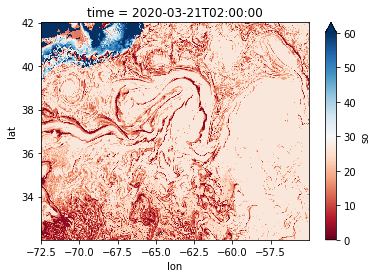

In [89]:
mldx.plot(vmin=0, vmax=60, cmap='RdBu')

(1500.0, 0.0)

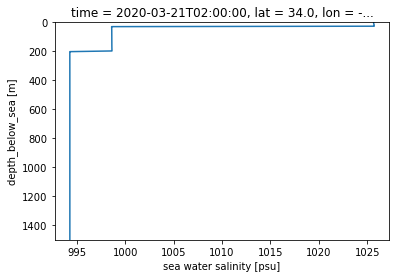

In [90]:
data_rho_mean.sel(lon=-67, lat=34, method='nearest').plot(y='depth')
plt.ylim(1500,0)

(1500.0, 0.0)

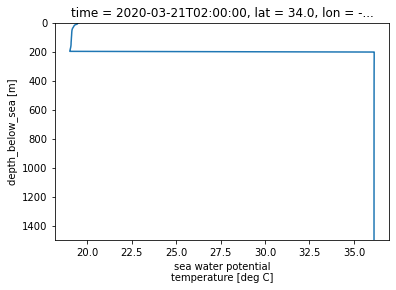

In [96]:
data_temp.sel(lon=-67, lat=34, method='nearest').plot(y='depth')
plt.ylim(1500,0)

In [84]:
data_rho_mean.drop('clon')

<xarray.DataArray 'so' (depth: 112, lat: 500, lon: 875)>
array([[[1025.31112945, 1025.31364025, 1025.31107499, ...,
         1025.5934831 , 1025.59258296, 1025.55496872],
        [1025.3210385 , 1025.31645608, 1025.31648704, ...,
         1025.59543021, 1025.57864312, 1025.53312184],
        [1025.34202043, 1025.33835851, 1025.33370773, ...,
         1025.58676342, 1025.55420877, 1025.50626371],
        ...,
        [ 999.90194579,  999.90194579,  999.90194579, ...,
         1026.59872632, 1026.5799098 , 1026.5015716 ],
        [ 999.90194579,  999.90194579,  999.90194579, ...,
         1026.61133975, 1026.54190461, 1026.58552497],
        [ 999.90194579,  999.90194579,  999.90194579, ...,
         1026.53766771, 1026.64928926, 1026.68902401]],

       [[1025.36528645, 1025.36669024, 1025.35730692, ...,
         1025.58508846, 1025.58500118, 1025.54705583],
        [1025.3804113 , 1025.39898227, 1025.40443611, ...,
         1025.58492771, 1025.57062877, 1025.52240162],
        [1025.38518721, 1025.41039584, 1025.4161811 , ...,
         1025.57564554, 1025.54673589, 1025.49770606],
...
        [ 999.90194579,  999.90194579,  999.90194579, ...,
          994.54032313,  994.5363599 ,  994.57267112],
        [ 999.90194579,  999.90194579,  999.90194579, ...,
          994.54190276,  994.57128756,  994.60122679],
        [ 999.90194579,  999.90194579,  999.90194579, ...,
          994.60896794,  994.58315395,  994.58854463]],

       [[ 994.29450723,  994.29409104,  994.29358343, ...,
          994.31848659,  994.31568885,  994.30999179],
        [ 994.2949543 ,  994.2951099 ,  994.29533095, ...,
          994.31581587,  994.31476396,  994.31298183],
        [ 994.29437632,  994.2946295 ,  994.29449859, ...,
          994.31590959,  994.31490948,  994.31677645],
        ...,
        [ 999.90194579,  999.90194579,  999.90194579, ...,
          994.54034861,  994.53637082,  994.57149698],
        [ 999.90194579,  999.90194579,  999.90194579, ...,
          994.54171351,  994.56943533,  994.59909481],
        [ 999.90194579,  999.90194579,  999.90194579, ...,
          994.60604033,  994.58159487,  994.58802597]]])
Coordinates:
  * depth    (depth) float64 3.0 8.0 11.5 14.5 ... 4.426e+03 4.883e+03 5.39e+03
    time     datetime64[ns] 2020-03-21T02:00:00
    clat     (lat, lon) float64 0.5588 0.5589 0.5589 ... 0.733 0.7331 0.7331
  * lat      (lat) float64 32.02 32.04 32.06 32.08 ... 41.94 41.96 41.98 42.0
  * lon      (lon) float64 -72.5 -72.48 -72.46 -72.44 ... -55.06 -55.04 -55.02
Attributes:
    standard_name:                sea_water_salinity
    long_name:                    sea water salinity
    units:                        psu
    code:                         5
    CDI_grid_type:                unstructured
    number_of_grid_in_reference:  1

In [36]:
so_smt1 = eva.load_smt_S()
to_smt1 = eva.load_smt_T()

In [43]:
so_smt1

<xarray.DataArray 'S001_sp' (depthc: 112, time: 984, ncells: 59799625)>
dask.array<concatenate, shape=(112, 984, 59799625), dtype=float32, chunksize=(1, 1, 59799625), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2010-01-09T01:00:00 ... 2010-03-31T23:00:00
  * depthc   (depthc) float64 2.5 6.5 9.5 12.5 ... 4.51e+03 4.975e+03 5.49e+03
Dimensions without coordinates: ncells
Attributes:
    standard_name:                salinity at level 001
    code:                         255
    CDI_grid_type:                unstructured
    number_of_grid_in_reference:  1

In [50]:
sal = so_smt1.isel(time=852)
temp = to_smt1.isel(time=852)
data_sal   = pyic.interp_to_rectgrid_xr(sal, fpath_ckdtree, lon_reg=lon_reg, lat_reg=lat_reg)
data_temp   = pyic.interp_to_rectgrid_xr(temp, fpath_ckdtree, lon_reg=lon_reg, lat_reg=lat_reg)
data_rho_mean2 = gsw.rho(data_sal, data_temp, sal.depthc[2].data)
mld2, mask2, mldx2 = eva.calc_mld_montegut_xr(data_rho_mean2, sal.depthc.data)


In [47]:
sal

<xarray.DataArray 'S001_sp' (depthc: 112, ncells: 59799625)>
dask.array<getitem, shape=(112, 59799625), dtype=float32, chunksize=(1, 59799625), chunktype=numpy.ndarray>
Coordinates:
    time     datetime64[ns] 2010-03-21T01:00:00
  * depthc   (depthc) float64 2.5 6.5 9.5 12.5 ... 4.51e+03 4.975e+03 5.49e+03
Dimensions without coordinates: ncells
Attributes:
    standard_name:                salinity at level 001
    code:                         255
    CDI_grid_type:                unstructured
    number_of_grid_in_reference:  1

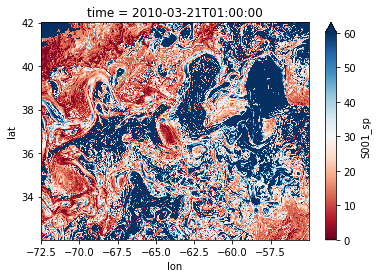

In [51]:
mldx2.plot(vmin=0, vmax=60, cmap='RdBu')

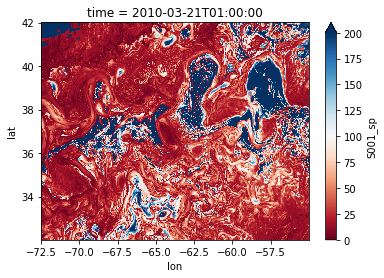

In [52]:
mldx2.plot(vmin=0, vmax=200, cmap='RdBu')

(1500.0, 0.0)

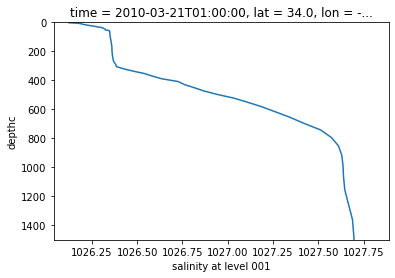

In [62]:
data_rho_mean2.sel(lon=-67, lat=34, method='nearest').plot(y='depthc')
plt.ylim(1500,0)

In [58]:
data_rho_mean2.sel(lon=-67, lat=34, method='nearest')

<xarray.DataArray 'S001_sp' (depthc: 112)>
array([1026.12348869, 1026.17620107, 1026.1901505 , 1026.19851481,
       1026.20917723, 1026.22098119, 1026.23607489, 1026.25153266,
       1026.26594722, 1026.27851158, 1026.29190366, 1026.3070234 ,
       1026.31086565, 1026.31605464, 1026.32139502, 1026.32403179,
       1026.32459421, 1026.33703089, 1026.34727589, 1026.3484259 ,
       1026.34847655, 1026.34787661, 1026.34837039, 1026.34894195,
       1026.3497735 , 1026.35010266, 1026.35016374, 1026.35007653,
       1026.35017626, 1026.35024282, 1026.35039897, 1026.35062943,
       1026.35087876, 1026.3514601 , 1026.35209055, 1026.35270753,
       1026.35319406, 1026.35373574, 1026.35420901, 1026.35457837,
       1026.35496934, 1026.3554085 , 1026.35589237, 1026.35622326,
       1026.35661279, 1026.35705521, 1026.35743656, 1026.35787793,
       1026.35841413, 1026.35891419, 1026.3594896 , 1026.35981578,
       1026.36023622, 1026.3606158 , 1026.36087665, 1026.36086373,
       1026.36104306, 1026.36098091, 1026.36111715, 1026.36122798,
       1026.36168783, 1026.36198103, 1026.36261346, 1026.36302235,
       1026.36375399, 1026.36458085, 1026.365806  , 1026.36736234,
       1026.36894553, 1026.37358335, 1026.3821365 , 1026.38502897,
       1026.4247693 , 1026.4771977 , 1026.54001466, 1026.58355176,
       1026.63540722, 1026.72687262, 1026.76033781, 1026.81473685,
       1026.86797725, 1026.93978168, 1027.03066276, 1027.10631331,
       1027.18491316, 1027.25825997, 1027.33934292, 1027.41788354,
       1027.51293383, 1027.5724165 , 1027.61147749, 1027.62950407,
       1027.6361567 , 1027.6391722 , 1027.6460777 , 1027.66604033,
       1027.68854961, 1027.69640811, 1027.70013875, 1027.70648778,
       1027.71757867, 1027.73096741, 1027.74465631, 1027.75998593,
       1027.77733976, 1027.79109452, 1027.80193924, 1027.80329269,
       1027.8002643 , 1027.79862573, 1027.79841627, 1027.79839199])
Coordinates:
    time     datetime64[ns] 2010-03-21T01:00:00
  * depthc   (depthc) float64 2.5 6.5 9.5 12.5 ... 4.51e+03 4.975e+03 5.49e+03
    lat      float64 34.0
    lon      float64 -67.0
Attributes:
    standard_name:                salinity at level 001
    code:                         255
    CDI_grid_type:                unstructured
    number_of_grid_in_reference:  1